The MNIST (Modified National Institute of Standards and Technology) handwritten digit classification problem is a standard dataset used in computer vision and deep learning. This dataset is used for training models to recognize handwritten digits. This has an application in scanning for handwritten pin-codes on letters. It contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9 (The training set contains 60,000 images and the testing set contains 10,000 images).

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot

In [31]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


The shape of each image is 28×28 which means that each image has 28pixels x 28pixels.

5


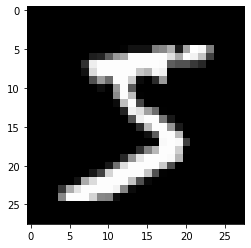

In [7]:
#Let's display the first image in the training set
pyplot.imshow(train_X[0], cmap=pyplot.get_cmap('gray'))
print(train_y[0])
pyplot.show()

Now, we must reshape our input data because the input to a Conv2D layer must be **four-dimensional**.
The first dimension defines the samples; in this case, there 60000 samples it the training set and 10000 samples in the testing set. The second dimension defines the number of rows; in this case, 28. The third dimension defines the number of columns, again 28 in this case, and finally the number of channels, which is one in this case because we don't have an RGB images but just a grayscale images, and as we know grayscale images have only single channel and pixel intensity varies between 0 (black) to 255(white).
[samples, rows, columns, channels]

In [38]:
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1)).astype('float32')
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1)).astype('float32')

Each pixel has an RGB color between 0 and 255 and to perform Machine Learning, it's important to convert all the values from 0 to 255 for every pixel to a range of values from 0 to 1 because CNN converg faster on **[0,1]** data than on **[0,255]**. Hence, we will have a normalized pixel values of our grayscale images. (And this is why we have converted the data type from unsigned integers to floats in the previous cell)

In [39]:
train_X = train_X / 255
test_X = test_X / 255

Our training data uses classes as numbers. Thereby, a classification model with multiple classes doesn't work well if we don't have classes distributed in a binary matrix. So, we can't simply train a classification model without transforming those numbers in proper vectors.

Therefor, by using to_categorical method, we can convert our test data which has integers that represent different categories into a numpy array which has binary values and has columns equal to the number of categories in the data (in our case 10 classes).

For example, (2 -> [0,0,1,0,0,0,0,0,0,0])

In [32]:
from tensorflow.keras.utils import to_categorical

print(train_y.shape)
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
print(train_y.shape)

(60000,)
(60000, 10)


Now that we have splitting our data to train and test sets, we can start building and training our model. And when it comes to the task of image classification, nothing can beat Convolutional deep learning Neural Networks (CNN).

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

In [43]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

#The Flatten layer is use to convert the final feature maps into a one single 1D vector.
model.add(Flatten())

model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#'categorical_crossentropy' works on one-hot encoded target, while 'sparse_categorical_crossentropy' works on integer target.
#So in our case, we gonna use the categorical_crossentropy because we have already one-hat encoded our training data.

In [44]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               540900    
_________________________________________________________________
batch_normalization_9 (Batch (None, 100)               400       
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [45]:
print(train_X.shape)
print(train_y.shape)

(60000, 28, 28, 1)
(60000, 10)


In [47]:
history = model.fit(train_X, train_y, epochs=10, batch_size=32, validation_data=(test_X, test_y), verbose=0)

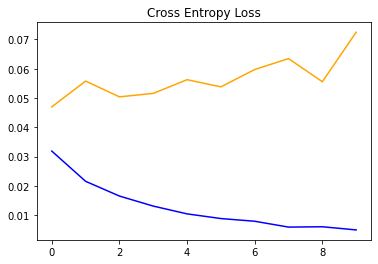

In [48]:
# plot diagnostic learning curves
import matplotlib.pyplot as plt

# plot loss
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

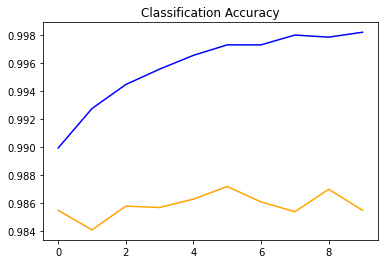

In [49]:
# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [50]:
scores = model.evaluate(test_X, test_y)

313/313 [==============================] - 3s 9ms/step - loss: 0.0724 - accuracy: 0.9855
